# Teste de Kolmogorov Smirnov

### Grupo: Erlon Lacerda , Maria Eduarda Bandeira

## Implementação

Xi | Fabs | Fac | Fobs | Zi | Fesp | |Fesp(Xi) - Fobs(Xi)| | |Fesp(Xi) - Fobs(Xi-1)|

Xi: Os valores únicos do conjunto utilizado

Fabs: Quantidade de vezes que esse valor se repete na amostra

Fac: Frequencia acumulada da frequencia absoluta

Fobs: Frequencia acumulada dividido pela quantidade de valores

Zi: valor x seguindo a distribuição normal

Fesp: Valor de Zi na tabela normal

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Gerando os valores aleatórios
#valores = np.random.normal(4.1, 2.5, size=(1000))
#valores = np.random.normal(0, 1, size=(40))
#valores = np.random.normal(5, 3, size=(1000000))

In [3]:
## https://stats.stackexchange.com/questions/113230/generate-random-numbers-following-a-distribution-within-an-interval

import numpy as np

min_val = 0
max_val = 10
mn = (max_val - min_val) / 2

count = 1000

# Generate numbers (mostly) from min to max
x = np.random.normal(loc=mn, scale=mn/3, size=count)

# Do something about the out-of-bounds generated values
x = np.maximum(min_val, x)
x = np.minimum(max_val, x)

valores = x

In [4]:
valores = np.abs(valores)
valores = [round(x, ndigits=1) for x in valores]
valores = np.array(valores)
for i in range(len(valores)):
    if valores[i] > 10:
        valores[i] = 10

valores[:5]

array([6.4, 6.5, 4.4, 5.6, 3.2])

In [5]:
# criando uma lista dos valores únicos do conjunto
xi = list(set(valores))

In [6]:
# Informações importantes sobre o conjunto de valores
media = np.mean(valores)
var = np.var(valores)
dp = np.std(valores)
cont = len(valores)
cont_unicos = len(xi)

print(' Média: ', media, '\n', 'Variância: ', var, '\n', 'Desvio Padrão: ', dp, '\n', 'Contagem: ', cont, '\n', 'Contagem de valores unicos: ', cont_unicos)

 Média:  4.916 
 Variância:  2.8567839999999998 
 Desvio Padrão:  1.6902023547492766 
 Contagem:  1000 
 Contagem de valores unicos:  91


In [7]:
colunas = ['Xi',
           'Fabs',
           'Fac',
           'Fobs',
           'Zi',
           'Fesp',
           '|Fesp(Xi) - Fobs(Xi)|',
           '|Fesp(Xi) - Fobs(Xi-1)|']

In [8]:
tabela = pd.DataFrame(columns=colunas)

In [9]:
tabela['Xi'] = xi

In [10]:
# Frequência absoluta: contagem de vezes que o valor aparece na amostra
fabs = pd.value_counts(valores)
fabs = fabs.sort_index()

/tmp/ipykernel_23722/3164291133.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  fabs = pd.value_counts(valores)


In [11]:
# dicionário para mapear os valores de 'Xi' para 'Fabs'
mapa_valores = dict(zip(fabs.index, fabs.values))

# 'Fabs' com base no mapeamento
tabela['Fabs'] = tabela['Xi'].map(mapa_valores)

In [12]:
tabela = tabela.sort_values(by='Xi').reset_index(drop=True)

In [13]:
# Frequência acumulada
tabela['Fac'] = tabela['Fabs'].cumsum()

In [14]:
# Frequência observada: frequência acumulada dividida pelo número de valores na amostra
tabela['Fobs'] = tabela['Fac'] / cont

In [15]:
# Zi: valor do xi seguindo a distribuição normal
tabela['Zi'] = (tabela['Xi'] - media) / dp

In [16]:
# Frequência esperada: valor do zi na tabela normal
tabela['Fesp'] = stats.norm.cdf(tabela['Zi'])

In [17]:
# diferença entre 'Fesp' e 'Fobs'
tabela['|Fesp(Xi) - Fobs(Xi)|'] = abs(tabela['Fesp'] - tabela['Fobs'])

In [18]:
# diferença entre 'Fesp' e 'Fobs' deslocando 'Fobs' em uma posição
tabela['|Fesp(Xi) - Fobs(Xi-1)|'] = abs(tabela['Fesp'] - tabela['Fobs'].shift(fill_value=0))

In [19]:
Dcalc = max([max(tabela['|Fesp(Xi) - Fobs(Xi-1)|']), max(tabela['|Fesp(Xi) - Fobs(Xi)|'])])
Dcalc

0.02328093320024116

In [20]:
## GO HORSE

<Axes: ylabel='Count'>

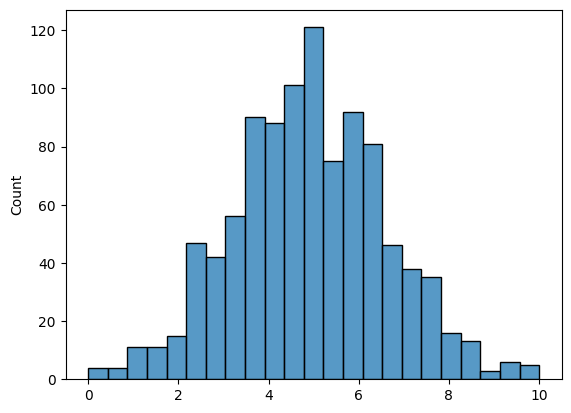

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(valores)

In [24]:
def plot(Xi, ac_dist,  label: str):
    plt.plot(Xi.values, ac_dist.values, label=label)

In [25]:
def plot_difference(Xi, obs, esp):
    X = Xi.values
    y1 = esp.values
    y2 = obs.values

    difference = []
    for i in range(len(y1)):
        difference.append(y2[i] - y1[i])

    for i in range(len(esp)):
        plt.plot([X[i], X[i]], [y1[i], y2[i]], color='red', linestyle='--', alpha=0.5)
        #plt.text(X[i], (y1[i] + y2[i]) / 2, f'{difference[i]:.2f}', ha='left', va='bottom')
    plt.plot([X[0], X[0]], [y1[0], y2[0]], color='red', linestyle='--', alpha=0.5, label='Diferença')

In [26]:
def show_plot(title: str):
    plt.title(title)
    plt.xlabel('Valor')
    plt.ylabel('Frequência Acumulada')
    plt.legend(loc='upper left')

    plt.grid(True)
    plt.show()

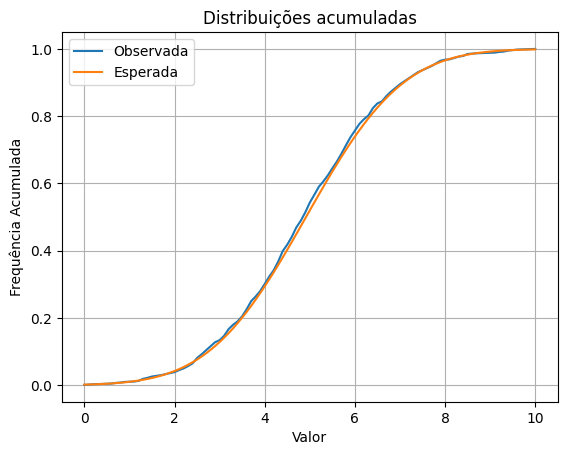

In [28]:
plot(tabela['Xi'], tabela['Fobs'], 'Observada')
plot(tabela['Xi'], tabela['Fesp'], 'Esperada')

show_plot('Distribuições acumuladas')

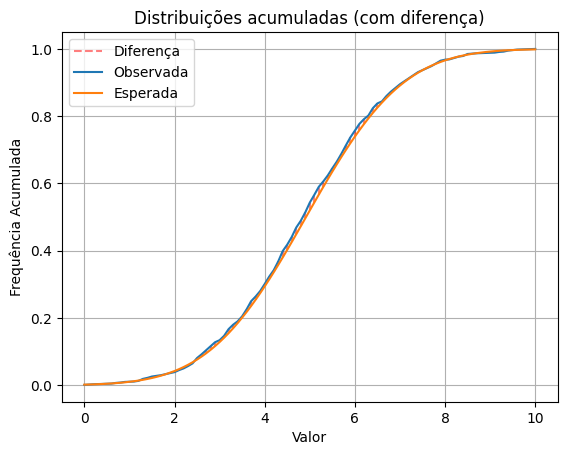

In [30]:
plot_difference(tabela['Xi'], tabela['Fobs'], tabela['Fesp'])

plot(tabela['Xi'], tabela['Fobs'], 'Observada')
plot(tabela['Xi'], tabela['Fesp'], 'Esperada')

show_plot('Distribuições acumuladas (com diferença)')

In [32]:
def kolmogorov_smirnov_critico(n):
    # table of critical values for the kolmogorov-smirnov test - 95% confidence
    # Source: https://www.soest.hawaii.edu/GG/FACULTY/ITO/GG413/K_S_Table_one_Sample.pdf
    # Source: http://www.real-statistics.com/statistics-tables/kolmogorov-smirnov-table/
    # alpha = 0.05 (95% confidential level)

    if n <= 40:
        # valores entre 1 e 40
        kolmogorov_critico = [0.97500, 0.84189, 0.70760, 0.62394, 0.56328, 0.51926, 0.48342, 0.45427, 0.43001, 0.40925,
                      0.39122, 0.37543, 0.36143, 0.34890, 0.33760, 0.32733, 0.31796, 0.30936, 0.30143, 0.29408,
                      0.28724, 0.28087, 0.27490, 0.26931, 0.26404, 0.25907, 0.25438, 0.24993, 0.24571, 0.24170,
                      0.23788, 0.23424, 0.23076, 0.22743, 0.22425, 0.22119, 0.21826, 0.21544, 0.21273, 0.21012]
        ks_critico = kolmogorov_critico[n - 1]
    elif n > 40:
        # valores acima de 40:
        kolmogorov_critico = 1.36/(np.sqrt(n))
        ks_critico = kolmogorov_critico
    else:
        pass

    return ks_critico

In [34]:
Dc = kolmogorov_smirnov_critico(cont)
Dc

0.04300697617828996

In [35]:
if Dc >= Dcalc:
  print("Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov")
else:
  print("Com 95% de confianca, temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov")

Com 95% de confianca, não temos evidências para rejeitar a hipótese de normalidade dos dados, segundo o teste de Kolmogorov-Smirnov


In [36]:
# Testando com a biblioteca padrão
ks_stat, ks_pvalue = stats.kstest(valores, stats.norm.cdf)
print(ks_stat)
print(ks_pvalue)

0.9442498680518208
0.0
